## Imports

In [5]:
%matplotlib inline

import bz2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib
import dill
matplotlib.rcParams['figure.figsize'] = [8, 6]

%load_ext autoreload
%autoreload 2

from xrdfit.spectrum_fitting import PeakParams, FitSpectrum, FitExperiment
import xrdfit.spectrum_fitting as spectrum_fitting
import analysis_functions as analysis

from scipy.signal import medfilt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Initial fit

Give the angle of the first cake:

In [6]:
first_cake_angle = 90

Load the data:

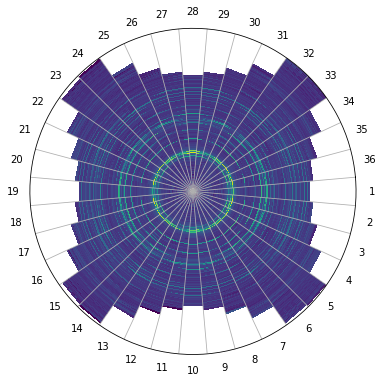

In [8]:
# spectral_data = FitSpectrum('../example_data/10deg_caked_data_for_SPP/adc_065_TI64_NDload_900C_15mms_ascii/adc_065_TI64_NDload_900C_15mms_00001.dat', first_cake_angle)
spectral_data = FitSpectrum('../../../SXRD_raw_data/diamond_2017/data_caked/10deg_caked_data_for_SPF/adc_065_TI64_NDload_900C_15mms_ascii/adc_065_TI64_NDload_900C_15mms_00001.dat', first_cake_angle)
spectral_data.plot_polar()

Choose the cakes to fit:

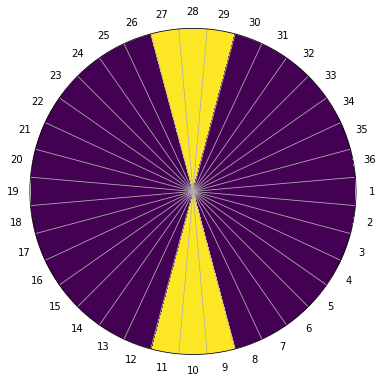

In [9]:
cakes_to_fit = [27,28,29,9,10,11]
spectral_data.highlight_cakes(cakes_to_fit)

Plot the spectra:

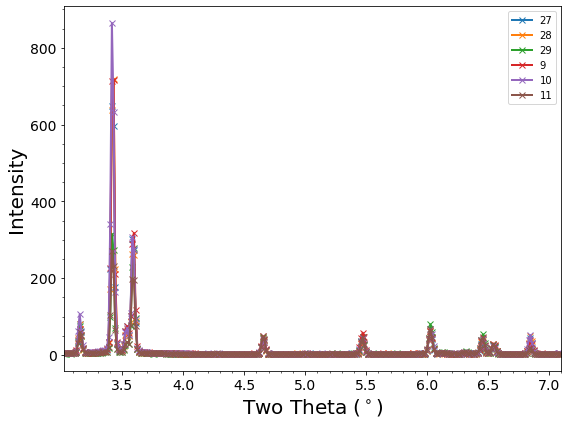

In [10]:
spectral_data.plot(cakes_to_fit, x_range=(3.02, 7.1), show_points=True)

Set the peak parameters:

In [15]:
peak_params = [
               PeakParams((3.02, 3.27), '(10-10)'),
               PeakParams((3.22, 4.0), ['(0002)', '(110)', '(10-11)'], [(3.4, 3.44), (3.52, 3.55), (3.57, 3.6)]),
               PeakParams((4.54, 4.8), '(10-12)'),
               PeakParams((4.9, 5.10), '(200)'),
               PeakParams((5.35, 5.6), '(11-20)'),
               PeakParams((5.9, 6.25), '(10-13)'),
#                PeakParams((5.9, 6.25), ['(10-13)', '(211)'], [(6.00, 6.05), (6.11, 6.15)]),
               PeakParams((6.19, 6.71), ['(20-20)', '(11-22)', '(20-21)'], [(6.3, 6.34), (6.43, 6.47), (6.52, 6.56)]),
#                PeakParams((6.7, 6.95), '(0004)', [(6.82, 6.87)]),
#                PeakParams((6.95, 7.35), ['(220)', '(20-22)'], [(7.05, 7.12), (7.16, 7.20)])
               PeakParams((6.7, 7.35), ['(0004)', '(220)', '(20-22)'], [(6.82, 6.87), (7.05, 7.12), (7.16, 7.20)])
               ]

Check the initial fits to constrain the peak parameters:

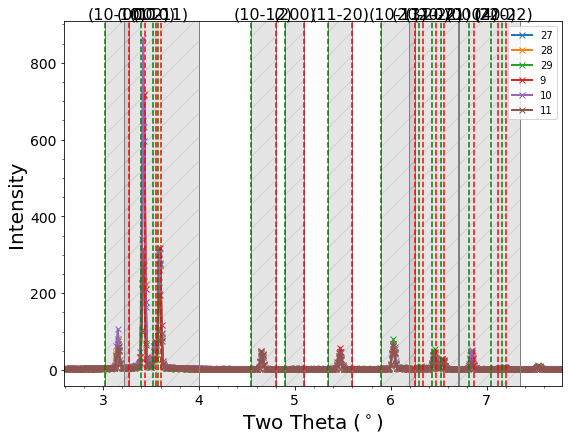

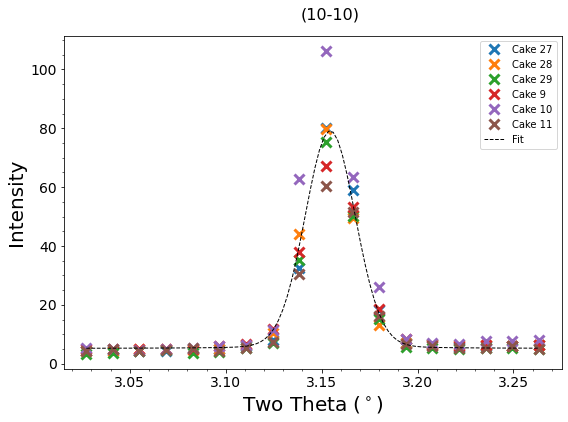

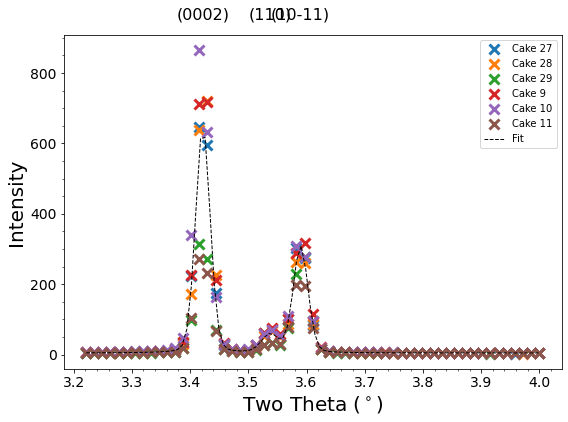

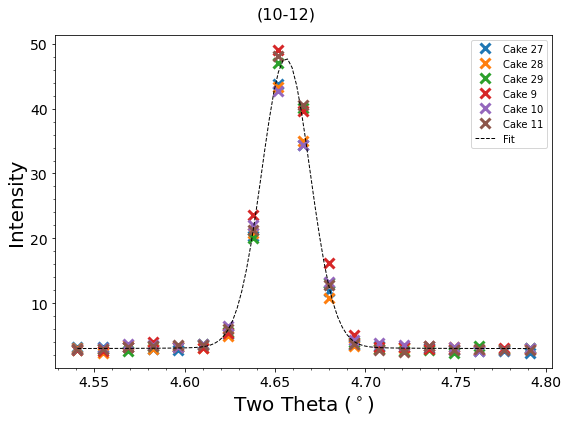

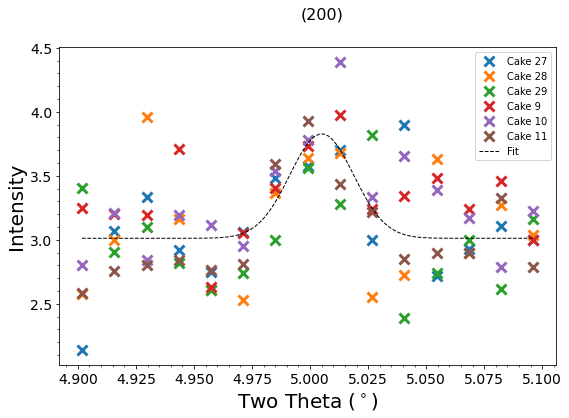

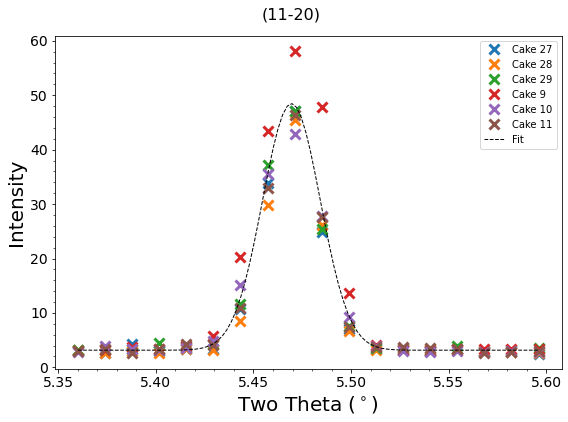

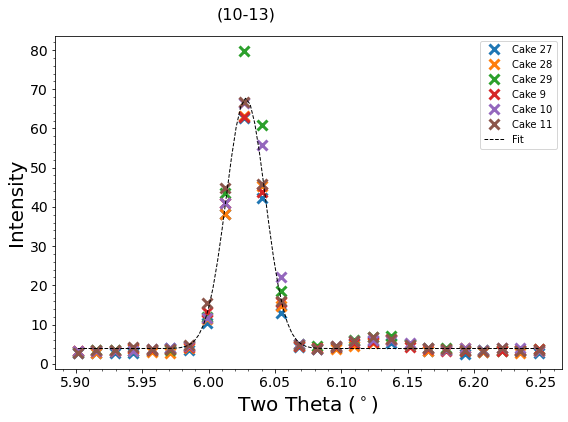

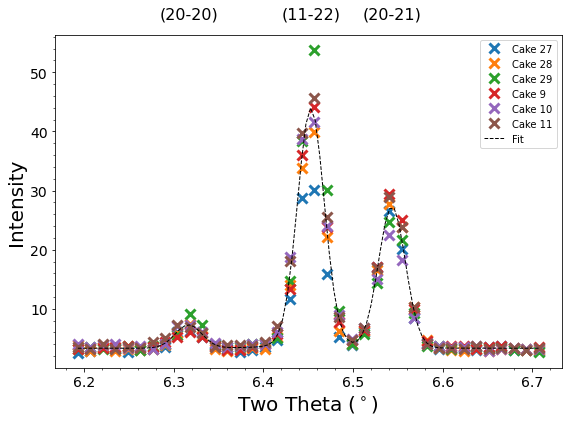

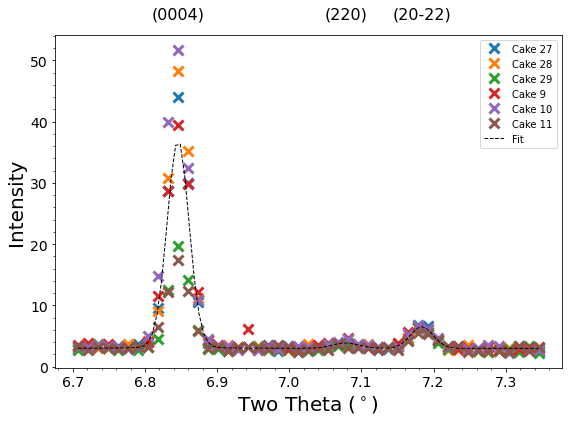

In [12]:
spectral_data.plot_peak_params(peak_params, cakes_to_fit, show_points=True)
spectral_data.fit_peaks(peak_params, cakes_to_fit, merge_cakes=False)

spectral_data.plot_fit('(10-10)')
spectral_data.plot_fit('(0002) (110) (10-11)')
spectral_data.plot_fit('(10-12)')
spectral_data.plot_fit('(200)')
spectral_data.plot_fit('(11-20)')
# spectral_data.plot_fit('(10-13) (211)')
spectral_data.plot_fit('(10-13)')
spectral_data.plot_fit('(20-20) (11-22) (20-21)')
# spectral_data.plot_fit('(0004)')
# spectral_data.plot_fit('(220) (20-22)')
spectral_data.plot_fit('(0004) (220) (20-22)')

Save/Load the peak parameters:

In [13]:
# define a file name to store the peak parameters
peak_params_file_name = "../example_analysis/peak_parameters/065_initial_peak_parameters.dump"

In [14]:
# save the peak parameters
with bz2.open(peak_params_file_name, 'wb') as output_file:
    dill.dump(peak_params, output_file)

FileNotFoundError: [Errno 2] No such file or directory: '../example_analysis/peak_parameters/065_initial_peak_parameters.dump'

In [ ]:
# load the peak parameters
with bz2.open(peak_params_file_name, "rb") as input_file:
    peak_params = dill.load(input_file)

## Check the instrument data

The `plot_instrument_data` function in `analysis_functions` can be used to load and plot the instrument data (ETMT analogue output) recorded with each of the diffraction pattern images.

Define a range covering the deformation (in steps of 100 ending with 1) and plot the instrument data:

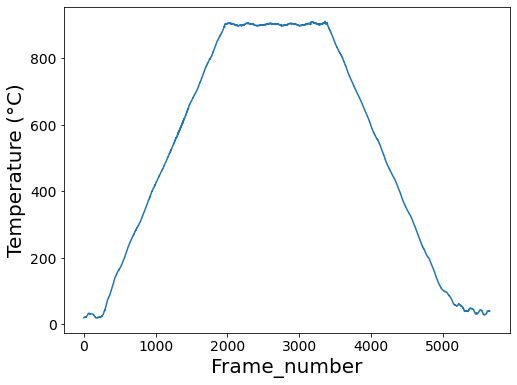

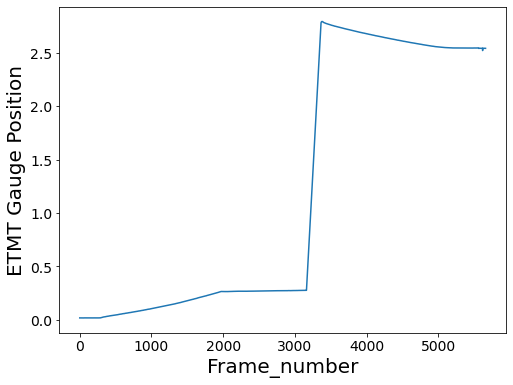

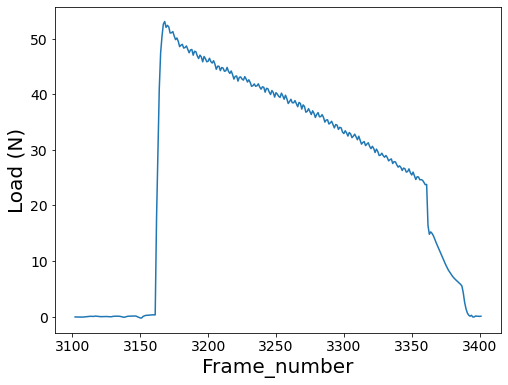

In [16]:
# define the file path to the instrument data 
file_path_instrument_data = "../example_data/image_load_files_for_DAWN/adc_065_TI64_NDload_900C_15mms.dat"

# set the range covering deformation
start_deform = 3101
end_deform = 3401

# the calculated max_frame will be used as the last step in a refinement
max_frame = analysis.plot_instrument_data(file_path_instrument_data, start_deform, end_deform)

## Run a refinement

User inputs:

In [ ]:
experiment_names = ['experiment1', 'experiment2']

for name in experiment_names:
    file_name = f'desy_2020/{name}/params.txt'
    params = file.load_params(file_name)
    

In [20]:
# give the frame time in seconds
frame_time = 0.1
# define the file path
#file_string = '../example_data/adc_065_TI64_NDload_900C_15mms_ascii/adc_065_TI64_NDload_900C_15mms_{:05d}.dat'
file_string = '../../../SXRD_raw_data/diamond_2017/data_caked/10deg_caked_data_for_SPF/adc_065_TI64_NDload_900C_15mms_ascii/adc_065_TI64_NDload_900C_15mms_{:05d}.dat'
# set merge cakes to false for multiple points
merge_cakes = False

# define which frames to fit
initial_steps = list(range(1, start_deform, 50))
deform_steps = list(range(start_deform, end_deform, 1))
end_steps = list(range(end_deform, max_frame, 50))
frames_to_fit = initial_steps + deform_steps + end_steps

Run the refinement:

In [21]:
experiment = FitExperiment(frame_time, file_string, first_cake_angle, cakes_to_fit, peak_params, merge_cakes, frames_to_fit)
# reuse fits for multiple peaks
experiment.run_analysis(reuse_fits=True)

Processing 408 diffraction patterns.


  0%|          | 0/408 [00:00<?, ?it/s]

Analysis complete.
The following fits took over 500 fitting iterations. The quality of these fits should be checked.
0.2% of fits for peak (10-10)
2.2% of fits for peak (0002) (110) (10-11)
0.2% of fits for peak (10-12)
1.7% of fits for peak (200)
7.8% of fits for peak (20-20) (11-22) (20-21)
21.6% of fits for peak (0004) (220) (20-22)


Check the fittings:

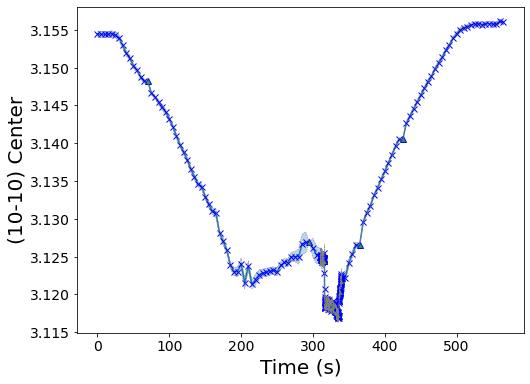

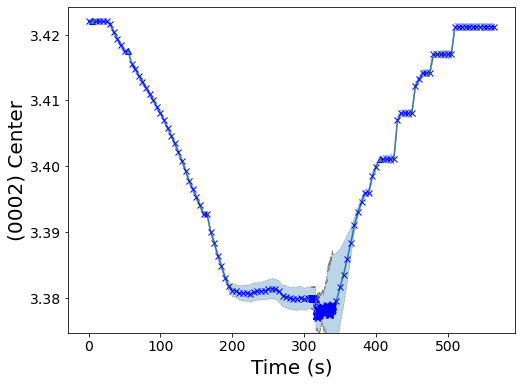

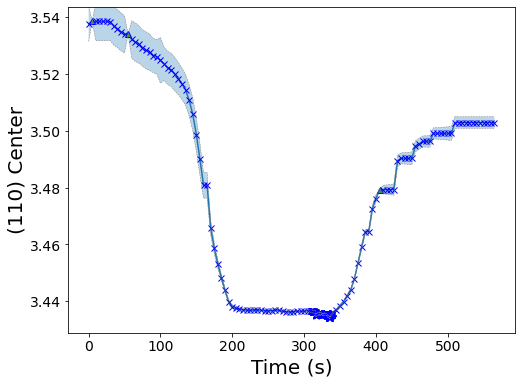

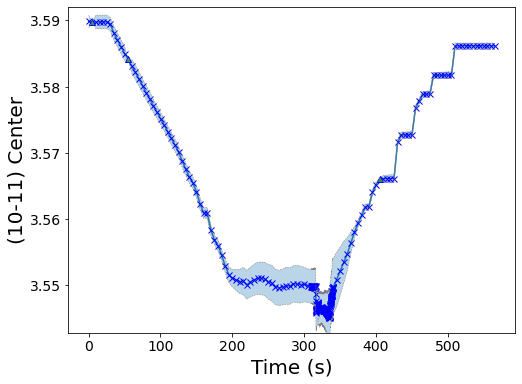

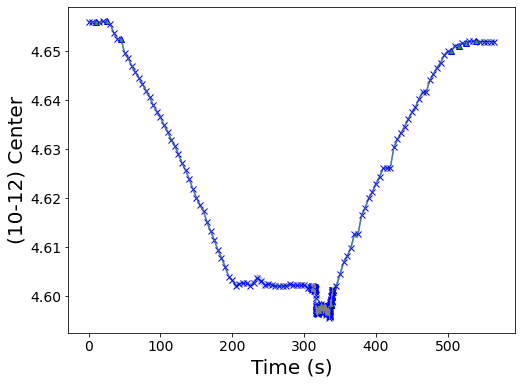

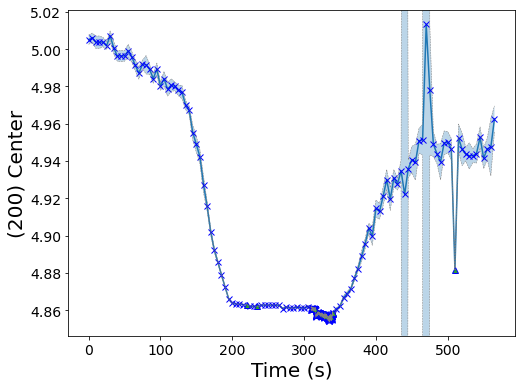

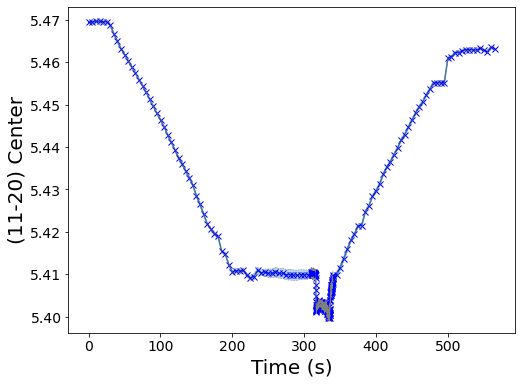

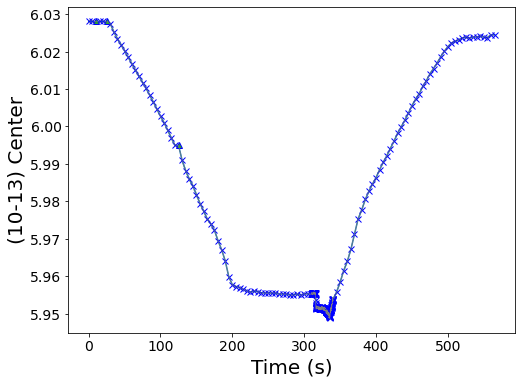

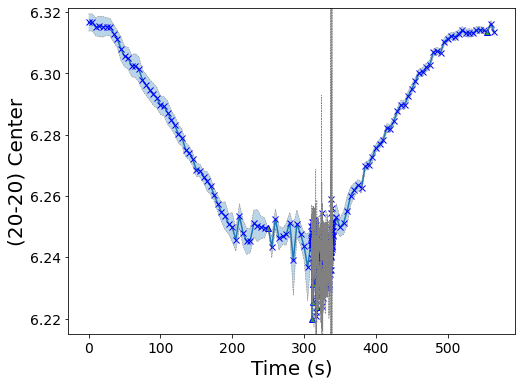

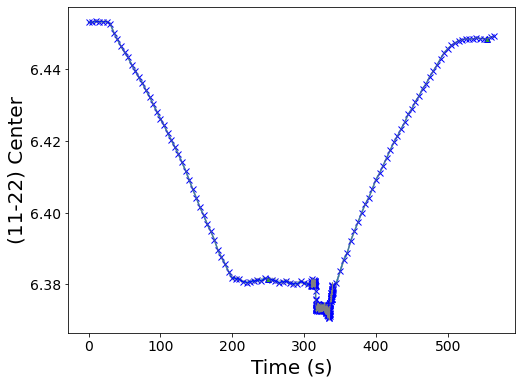

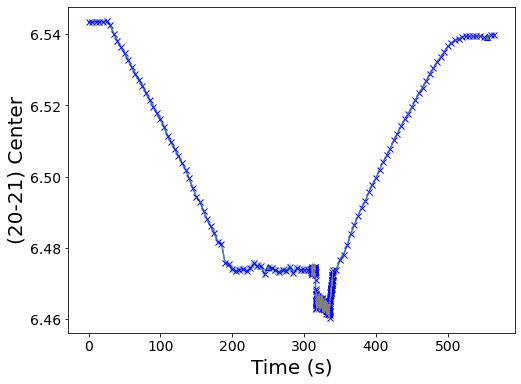

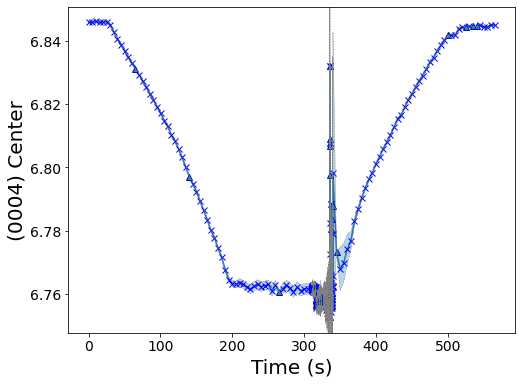

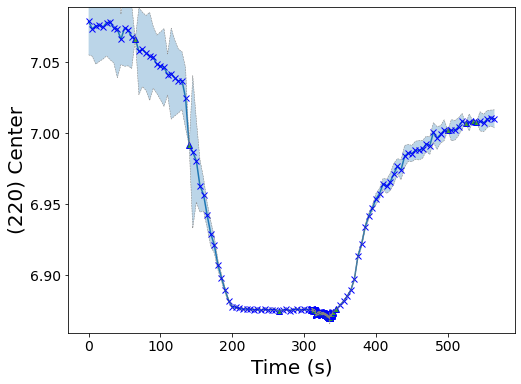

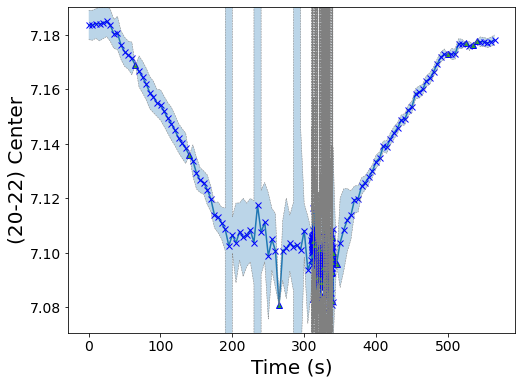

In [22]:
experiment.plot_fit_parameter("(10-10)", "(10-10)_center", show_points=True)
experiment.plot_fit_parameter("(0002)", "(0002)_center", show_points=True)
experiment.plot_fit_parameter("(110)", "(110)_center", show_points=True)
experiment.plot_fit_parameter("(10-11)", "(10-11)_center", show_points=True)
experiment.plot_fit_parameter("(10-12)", "(10-12)_center", show_points=True)
experiment.plot_fit_parameter("(200)", "(200)_center", show_points=True)
experiment.plot_fit_parameter("(11-20)", "(11-20)_center", show_points=True)
experiment.plot_fit_parameter("(10-13)", "(10-13)_center", show_points=True)
# experiment.plot_fit_parameter("(211)", "(211)_center", show_points=True)
experiment.plot_fit_parameter("(20-20)", "(20-20)_center", show_points=True)
experiment.plot_fit_parameter("(11-22)", "(11-22)_center", show_points=True)
experiment.plot_fit_parameter("(20-21)", "(20-21)_center", show_points=True)
experiment.plot_fit_parameter("(0004)", "(0004)_center", show_points=True)
experiment.plot_fit_parameter("(220)", "(220)_center", show_points=True)
experiment.plot_fit_parameter("(20-22)", "(20-22)_center", show_points=True)

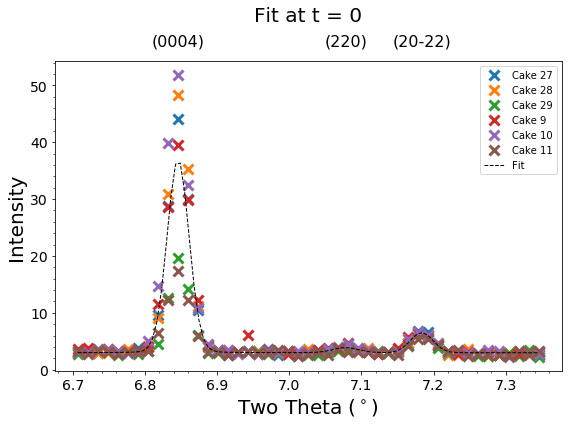

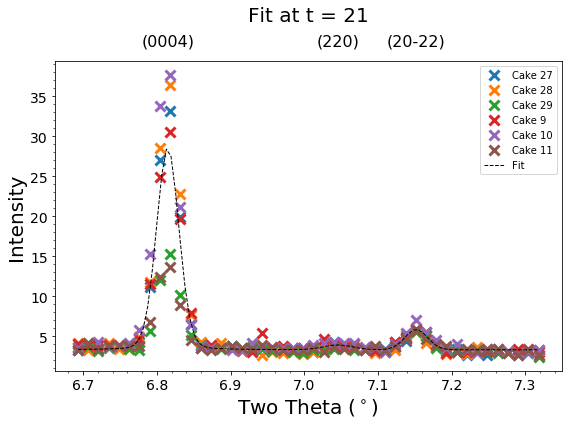

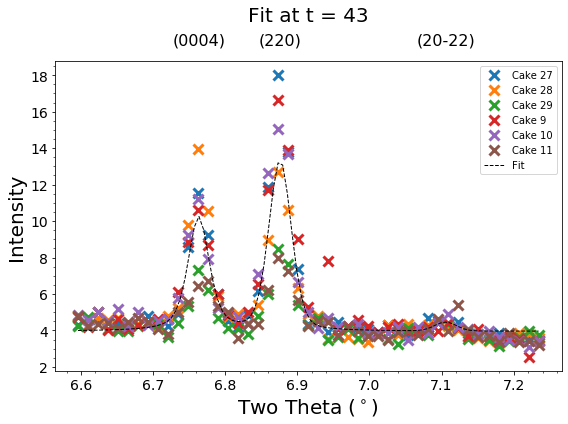

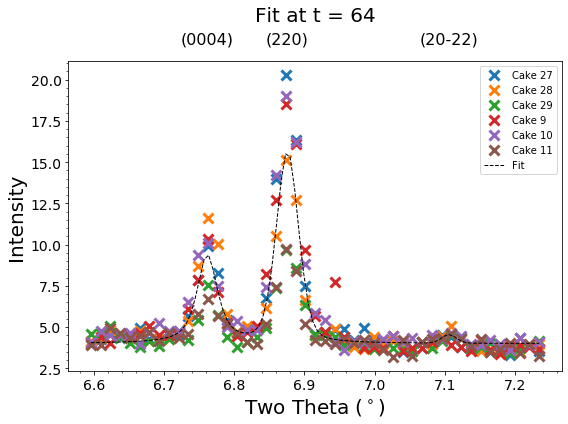

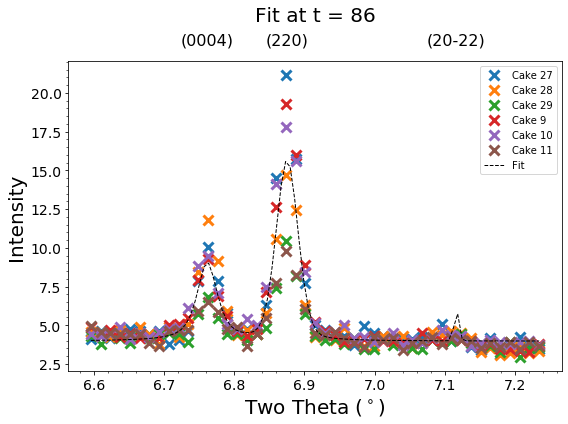

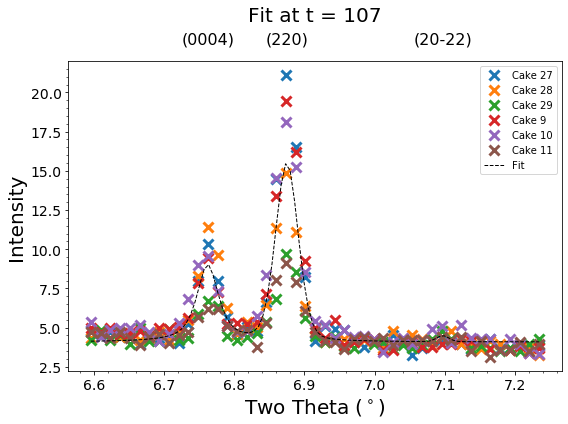

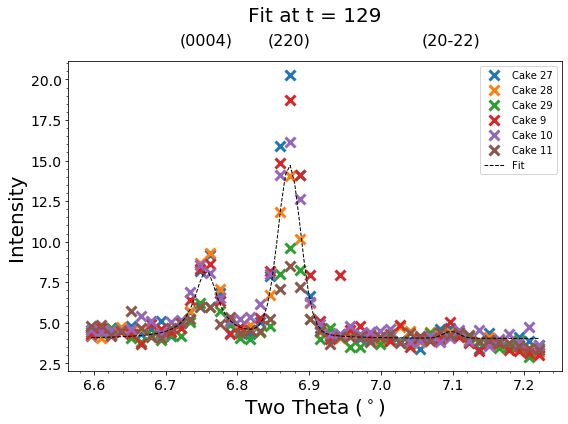

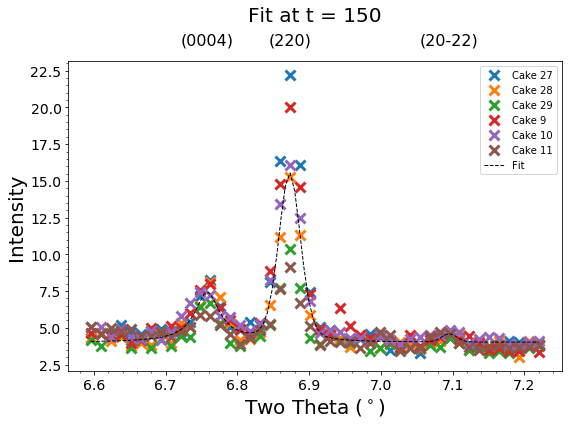

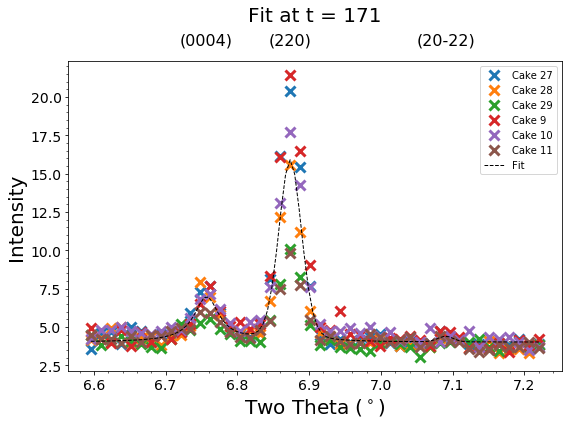

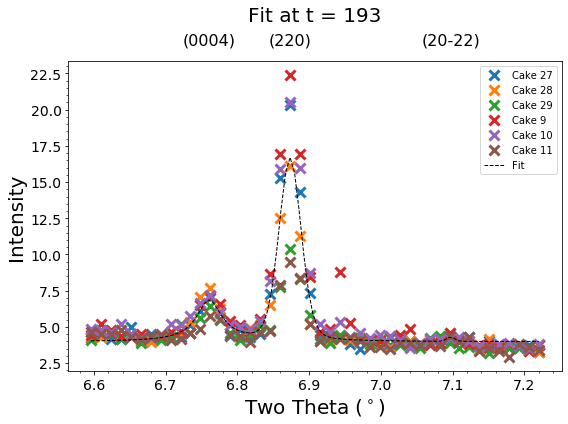

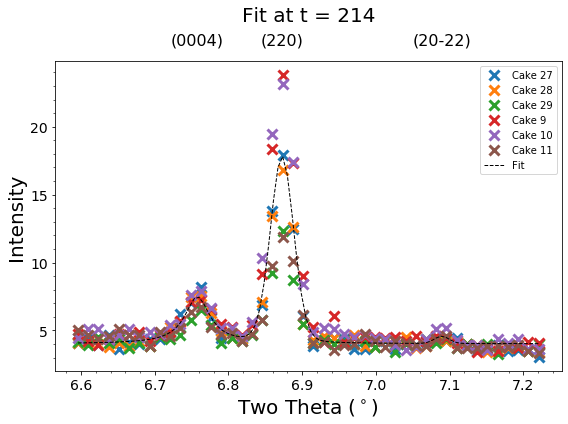

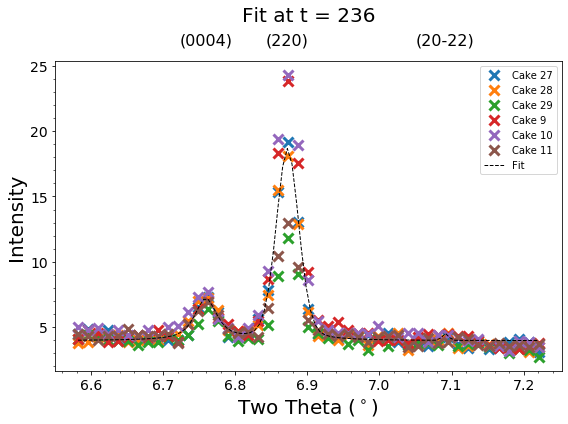

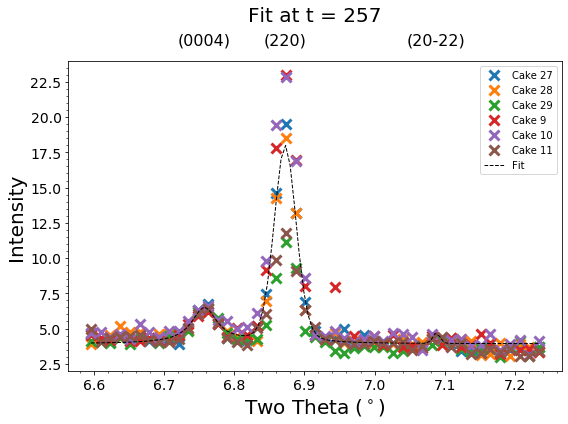

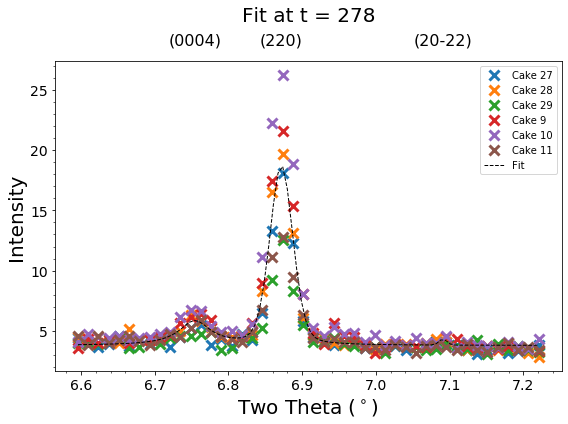

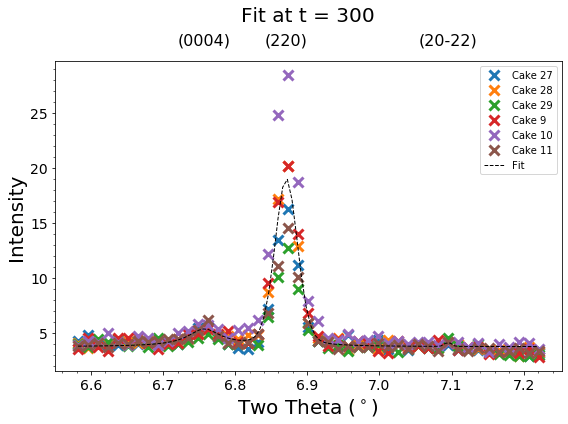

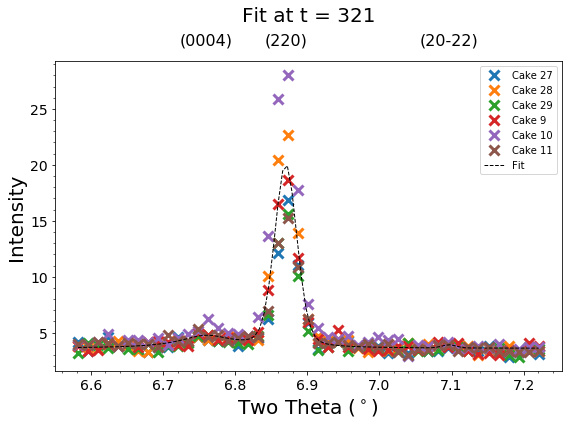

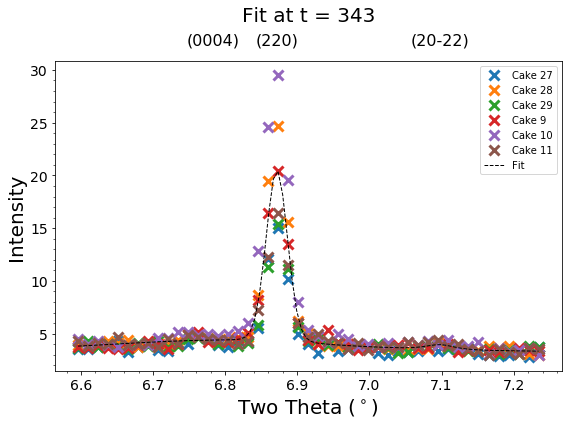

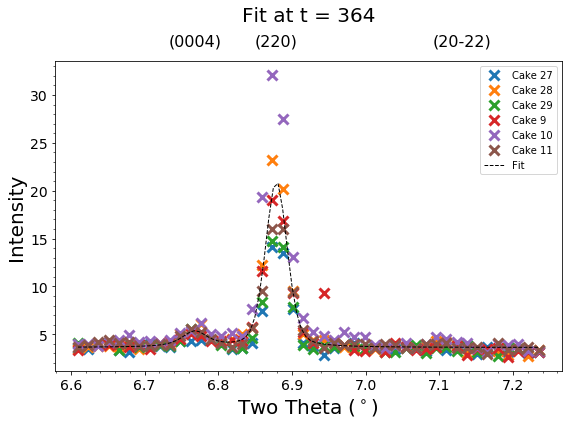

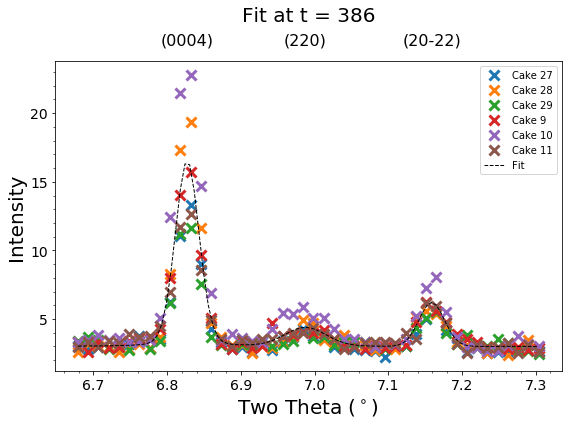

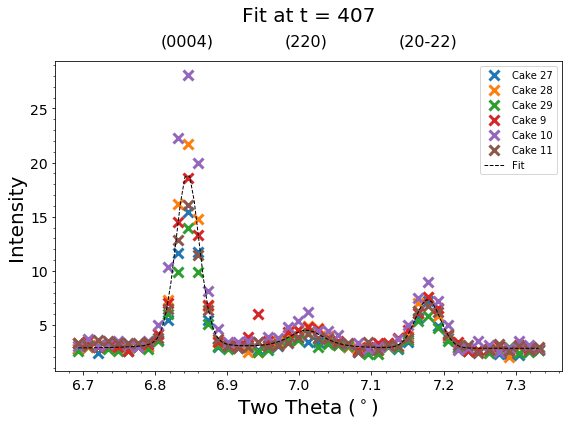

In [33]:
experiment.plot_fits(peak_names=["(0004)"], num_time_steps=20)

## Save the fits

In [68]:
experiment.save("../example_analysis/experiment_fits/065_xrdfit.dump")

Saving data to dump file.
Data successfully saved to dump file.


## Reload the data

In [20]:
experiment = spectrum_fitting.load_dump("../example_analysis/experiment_fits/065_xrdfit.dump")

Loading data from dump file.
Data successfully loaded from dump file.


Check which peaks have been analysed:

In [21]:
experiment.peak_names()

['(10-10)',
 '(0002) (110) (10-11)',
 '(10-12)',
 '(200)',
 '(11-20)',
 '(10-13)',
 '(20-20) (11-22) (20-21)',
 '(0004) (220) (20-22)']

Define a peak list from the peak names to plot the data:

In [22]:
# full_peak_list='(10-10)','(0002)','(110)','(10-11)','(10-12)','(200)','(11-20)','(10-13)','(211)','(20-20)','(11-22)','(20-21)','(0004)','(220)'
full_peak_list='(10-10)','(0002)','(110)','(10-11)','(10-12)','(200)','(11-20)','(10-13)','(20-20)','(11-22)','(20-21)','(0004)','(220)'
reduced_peak_list='(10-10)','(0002)','(110)','(10-11)','(10-12)','(200)','(11-20)','(10-13)','(11-22)','(20-21)'

## Set the colour and marker scheme

Colour and marker scheme:

Alpha phase uses discretised viridis colour scheme, calculated using `colour_range` in the `analysis_functions`:

In [31]:
N=9
analysis.colour_range(N)

['#fde725',
 '#addc30',
 '#5ec962',
 '#28ae80',
 '#21918c',
 '#2c728e',
 '#3b528b',
 '#472d7b',
 '#440154']

Beta phase uses adjusted colour scheme from https://learnui.design/tools/data-color-picker.html#palette with 7 colours chosen.

This gives the combined colour scheme for each lattice plane:

In [25]:
plane_colour = {
'(10-10)' : '#fde725',
'(0002)' : '#addc30',
'(10-11)' : '#5ec962',
'(10-12)' : '#28ae80',
'(11-20)' : '#21918c',
'(10-13)' : '#2c728e',
'(20-20)' : '#3b528b',
'(11-22)' : '#472d7b',
'(20-21)' : '#440154',
'(110)' : '#ff764a',
'(200)' : '#ef5675',
'(211)' : '#bc5090',
'(220)' : '#ffa600',
}

The marker scheme for each lattice plane is given here:

In [26]:
plane_marker = {
'(10-10)' : 's', #square
'(0002)' : 'H', #hexagon
'(10-11)' : '^', #ltriangle - up
'(10-12)' : 'v', #ytriangle - down
'(11-20)' : 'D', #diamond
'(10-13)' : '<', #triangle - left
'(20-20)' : 'd', #thin diamond
'(11-22)' : '*', #star
'(20-21)' : 'o', #circle
'(110)' : '+', #plus
'(200)' : 'x', #cross
'(211)' : 'X', #cross (filled)
'(220)' : 'P', #plus (filled)
}

## Synchronise the ETMT data

Load the instrument data (ETMT analogue output) recorded with each of the diffraction pattern images and determine the exact start/end of the deformation:

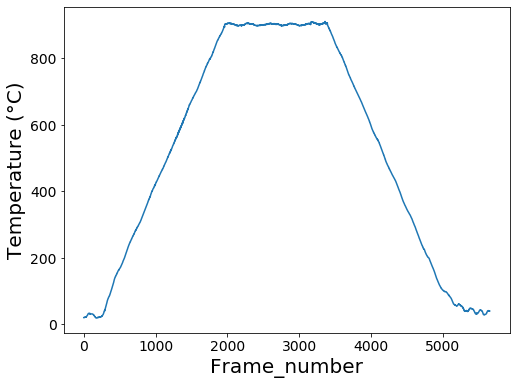

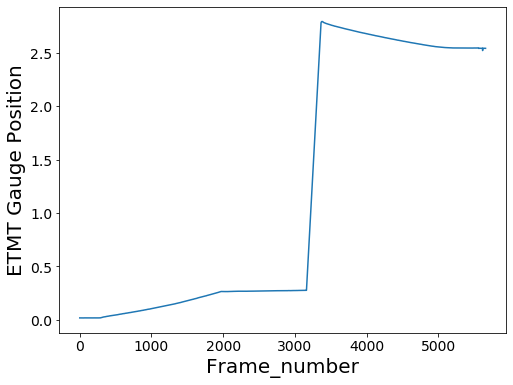

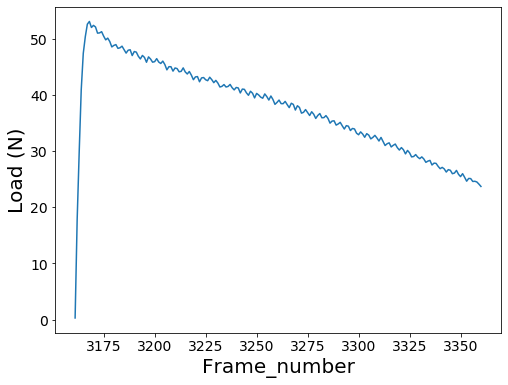

5657

In [27]:
file_path_instrument_data = "../example_data/image_load_files_for_DAWN/adc_065_TI64_NDload_900C_15mms.dat"

# change this value until the load is zero, this will determine the start (and end) point of deformation
start_deform = 3160

# set the applied deformation speed in mm/s
deform_speed = 0.15
# set the end position in mm
final_deform_position = 3

# set the acquisition frequency of the SXRD detector (and the instrument data) in Hz
acquisition_freq_sxrd = 10
# set the acquisition frequency of data recorded on the ETMT in Hz
acquisition_freq_etmt = 50

# calculate the number of frames (individual measurements) during deformation
number_deform_frames = int((final_deform_position / deform_speed) * acquisition_freq_sxrd)
# calculate the end point (final frame) of deformation
end_deform = int(start_deform + number_deform_frames)

# plot the instrument data (ETMT analogue output)
analysis.plot_instrument_data(file_path_instrument_data, start_deform, end_deform)

Load the true stress-strain data recorded on the ETMT. True stress and strain are calculated using the resistance method in a previous notebook. The data has already been reduced to start at the point of applied load.

The `plot_ETMT_data` function in the `analysis_functions` returns arrays of the true stress and true strain at the adjusted acquisition frequency of the recorded diffraction pattern images.

5


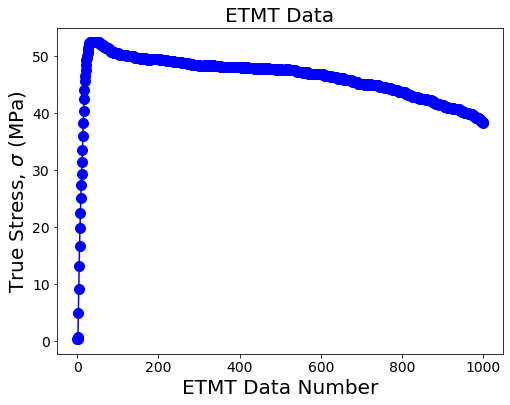

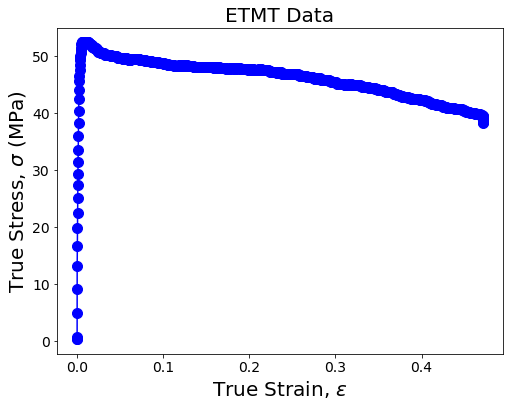

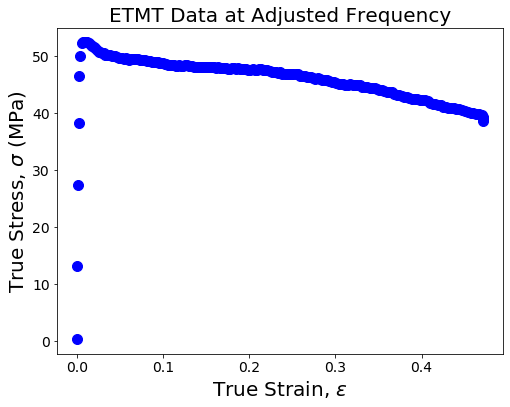

In [32]:
file_path_etmt_data = '../example_data/ETMT_data/065_ETMT.txt'

first_point = 1
last_point = 1000

filter_data = 45

true_stress, true_strain = analysis.plot_ETMT_data(file_path_etmt_data, number_deform_frames, first_point, last_point, acquisition_freq_sxrd, 
                                          acquisition_freq_etmt, filter_data)

## Plotting the SXRD data

Prefix for saving plots:

In [33]:
save_number = '065'

Grab the center, amplitude and fwhm data for each of the lattice plane peaks. Note, these arrays, contain time in the first column, the parameter in the second column and the error in the third column:

In [34]:
peak_center=dict()
peak_amplitude=dict()
peak_fwhm=dict()

for peak_name in full_peak_list:
    peak_center[peak_name]=experiment.get_fit_parameter(peak_name, f"{peak_name}_center")
    peak_amplitude[peak_name]=experiment.get_fit_parameter(peak_name, f"{peak_name}_amplitude")
    peak_fwhm[peak_name]=experiment.get_fit_parameter(peak_name, f"{peak_name}_fwhm")

The `find_nearest` function in the `analysis_functions` is used to match the diffraction pattern images with the ETMT (true stress, ture strain) data:

In [36]:
# A delay term is needed since the images start from 1 (not 0) and so the time starts from 0.1 seconds (not 0 seconds).
delay = 0.1

# find the time for the start/end of deformation
time_steps=peak_center[peak_name][:,0]
start_deform_time = (start_deform/acquisition_freq_sxrd) - delay
end_deform_time = (end_deform/acquisition_freq_sxrd) - delay

# find the array index for the start/end of deformation
start_deform_index = analysis.find_nearest(time_steps, start_deform_time)
end_deform_index = analysis.find_nearest(time_steps, end_deform_time)

value to match = 315.9 value found in array = 315.90000000000003 index of array = 120
value to match = 335.9 value found in array = 335.90000000000003 index of array = 320


Plot the micromechanical strain partitioning (true stress versus microstrain)

The `calc_strain` function in `analysis_functions` is used to calculate the microstrain:

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.02726830844070216
0.029493732669664353
0.029987520513251573
0.030977663398243798
0.04015270152160823
0.042419456651907224
0.0472092642224233
0.051970382840872416
0.055673593531800306
0.056495398469084246


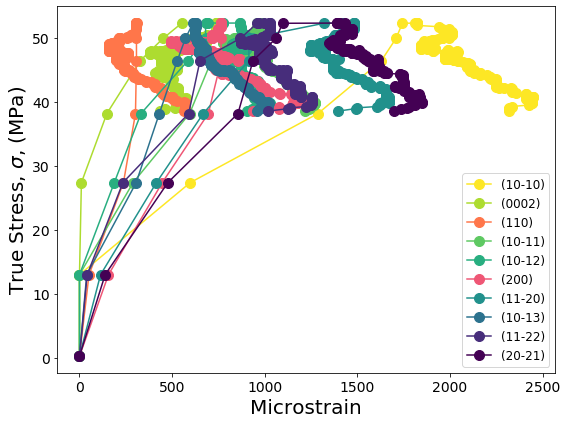

In [46]:
for peak_name in reduced_peak_list:
    microstrain = analysis.calc_strain(peak_center[peak_name][(start_deform_index):(end_deform_index), 1])*1e6
    microstrain = medfilt(microstrain,15)
    plt.plot(microstrain,true_stress,'-o',color=plane_colour[peak_name],markersize=10,label=peak_name)
    plt.legend(fontsize=12)
    plt.ylabel('True Stress, ${\sigma}$, (MPa)')
    plt.xlabel('Microstrain')

plt.tight_layout()
save_plot_path='../example_analysis/plots/' + save_number + '_strain_partitioning'
plt.savefig(save_plot_path, format='eps')